In [1]:
# from linear_reg import LinearRegOneVar

%matplotlib inline
%load_ext autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\projects\linear_reg_from_scratch\data\Housing.csv')

In [79]:
df = df[["area", "price"]]  
rescaled_df = (df - df.mean()) / df.std() # rescale the data
df = rescaled_df
df.insert(0, "ones", 1) # insert a column of 1's as the first entry in the dataframe
print(df.head())

cols = df.shape[1]
X = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]
theta = np.matrix(np.array([0,0]))

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

   ones      area     price
0     1  1.045766  4.562174
1     1  1.755397  4.000809
2     1  2.216196  4.000809
3     1  1.082630  3.982096
4     1  1.045766  3.551716


In [80]:
def compute_cost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(X))


print(compute_cost(X, y, theta))

0.4990825688073395


In [81]:
def gradient_descent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = compute_cost(X, y, theta)
        
    return theta, cost


In [85]:
alpha = 0.01
iters = 1000
g, cost = gradient_descent(X, y, theta, alpha, iters)

In [86]:
#best fit line:

x = np.linspace(df.area.min(), df.area.max(), 100)

f = g[0, 0] + (g[0, 1] * x)

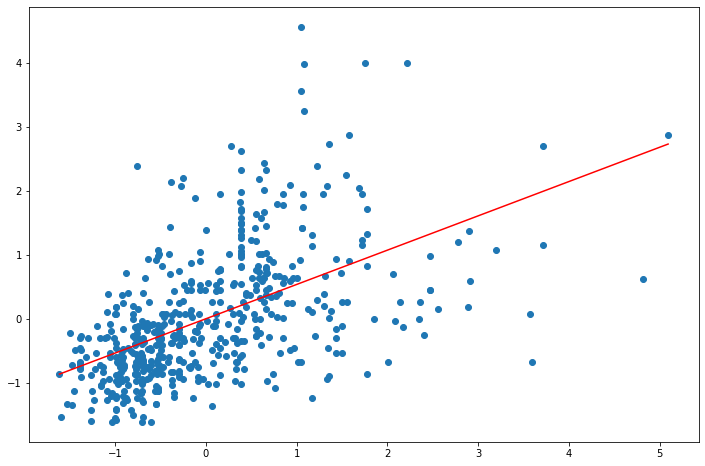

In [87]:
#draw the line:

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.area, df.price, label='Traning Data')


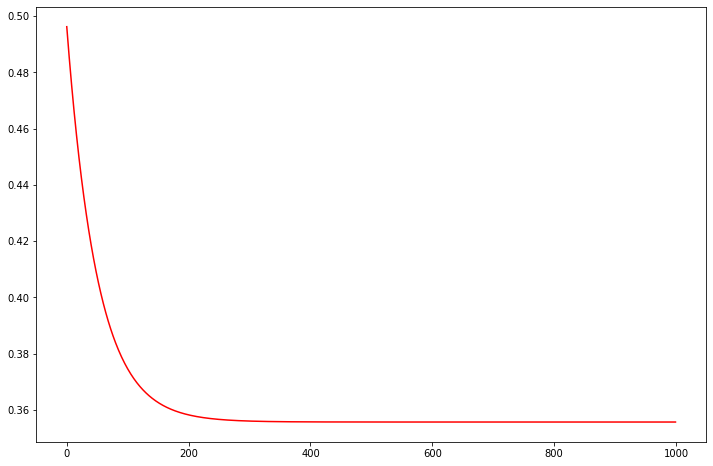

In [88]:
# draw error graph
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')


In [89]:
# predict price for an area 
def predict_price(area,g):
    return g[0, 0] + (g[0, 1] * area)

In [91]:
print(g)

[[2.77959103e-16 5.35973773e-01]]


In [2]:
from linear_reg import LinearRegression
df = pd.read_csv('D:\projects\linear_reg_from_scratch\data\Housing.csv')
df.head()
df = df.select_dtypes(include=['int'])

NameError: name 'pd' is not defined

In [4]:
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [1]:
model = LinearRegression(data=df, target='price')

model.fit()

NameError: name 'LinearRegression' is not defined

In [ ]:
model.predict(np.array([1000, 2, 4, 3, 5]))